In [47]:
!kaggle datasets download bryanb/cac40-stocks-dataset

Dataset URL: https://www.kaggle.com/datasets/bryanb/cac40-stocks-dataset
License(s): CC0-1.0
cac40-stocks-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [48]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()
import math
from sklearn import metrics

In [49]:
with ZipFile("/content/cac40-stocks-dataset.zip") as file:
  file.extractall("/content/cac40-stocks-dataset")

<div id="chap2"><h1 style="color:white;background:#5963ab;border-radius:5px;padding:30px;font-family:'Arial', cursive;font-size:50px;text-align:center">Preprocessing</h1></div>

In [50]:
data = pd.read_csv('/content/cac40-stocks-dataset/preprocessed_CAC40.csv', parse_dates=['Date'])

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97648 entries, 0 to 97647
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     97648 non-null  int64         
 1   Name           97648 non-null  object        
 2   Date           97648 non-null  datetime64[ns]
 3   Open           97418 non-null  float64       
 4   Closing_Price  97646 non-null  float64       
 5   Daily_High     97444 non-null  float64       
 6   Daily_Low      97444 non-null  float64       
 7   Volume         77195 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 6.0+ MB


In [52]:
data.describe(include ='all')

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
count,97648.00000,97648,97648,97418.000000,97646.000000,97444.000000,97444.000000,77195
unique,NaN,38,NaN,NaN,NaN,NaN,NaN,15774
top,NaN,EssilorLuxottica,NaN,NaN,NaN,NaN,NaN,100
freq,NaN,2601,NaN,NaN,NaN,NaN,NaN,779
mean,48823.50000,NaN,2015-02-22 20:58:03.204980992,68.737224,68.823124,69.145090,68.357316,NaN
min,0.00000,NaN,2010-01-04 00:00:00,3.370000,3.370000,3.410000,3.350000,NaN
25%,24411.75000,NaN,2012-07-30 00:00:00,24.810000,24.840000,24.960000,24.650000,NaN
50%,48823.50000,NaN,2015-03-04 00:00:00,46.880000,46.980000,47.160000,46.640000,NaN
75%,73235.25000,NaN,2017-09-13 00:00:00,81.717500,81.860000,82.220000,81.262500,NaN
max,97647.00000,NaN,2020-04-03 00:00:00,724.000000,724.000000,724.000000,718.000000,NaN


In [53]:
data.dropna(inplace=True)

In [54]:
data.isnull().sum()

,0
Unnamed: 0,0
Name,0
Date,0
Open,0
Closing_Price,0
Daily_High,0
Daily_Low,0
Volume,0


In [55]:
data.head()

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


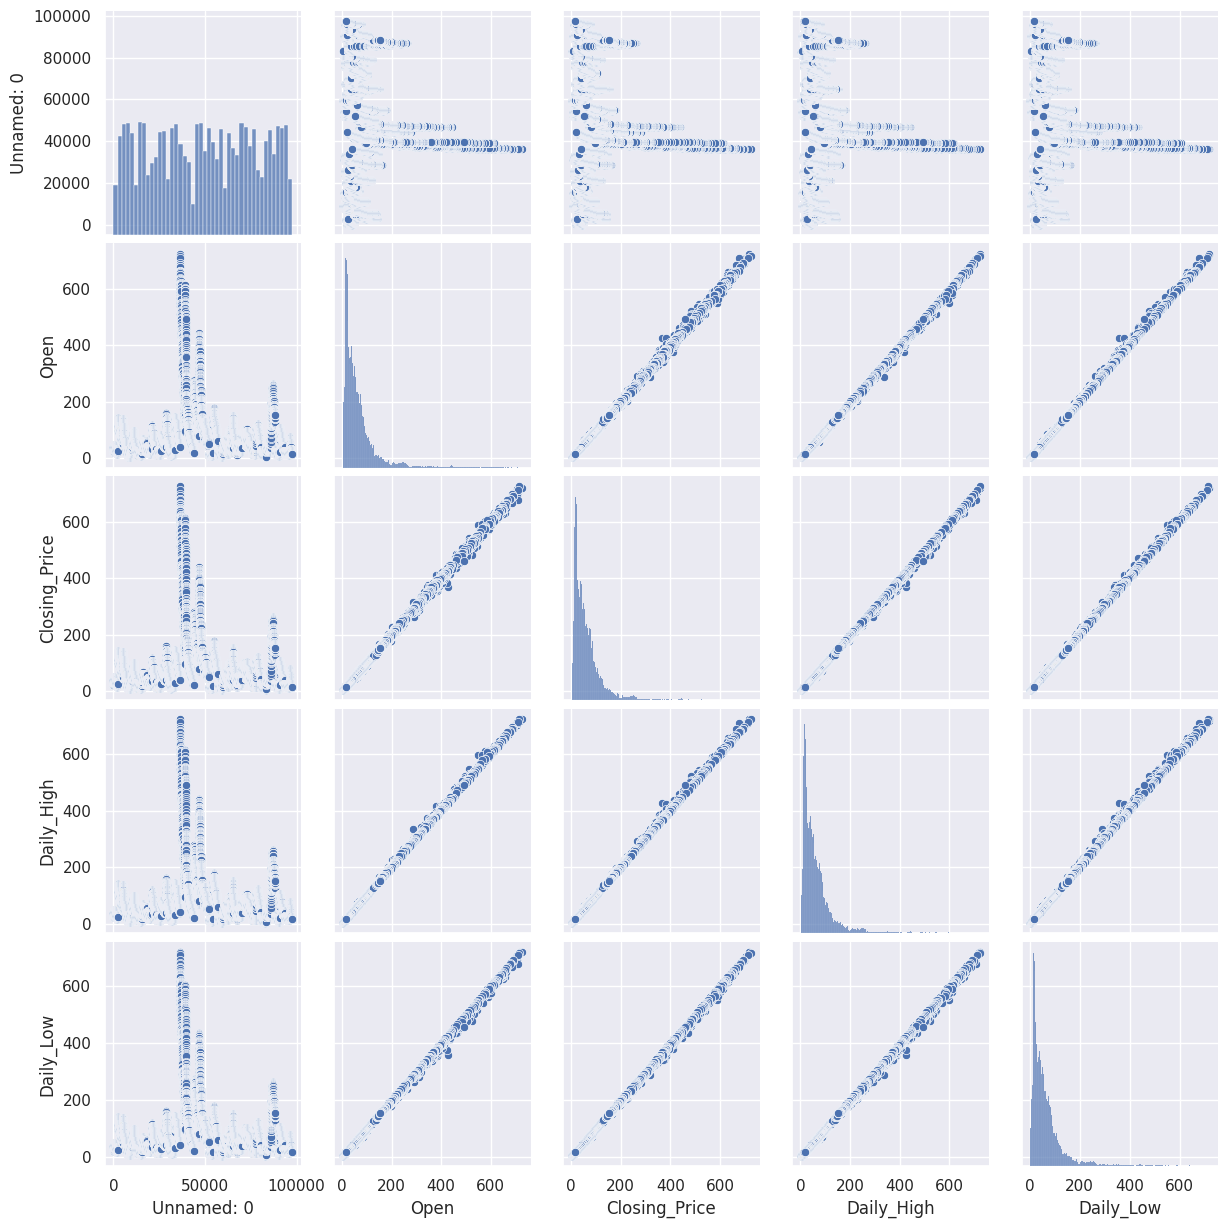

In [56]:
sns.pairplot(data)
plt.show()

In [57]:
x=data[['Daily_High','Daily_Low','Open']].values   #input
y=data[['Closing_Price']].values

<div id="chap4"><h1 style="color:white;background:#5963ab;border-radius:5px;padding:30px;font-family:'Arial', cursive;font-size:50px;text-align:center">Training</h1></div>

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [59]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [60]:
lm.coef_

array([[ 0.87839919,  0.81398445, -0.69244746]])

In [61]:
lm.score(x_train,y_train)

0.9999596978742641

In [62]:
predictions = lm.predict(x_test)

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9999631156447708

In [64]:
dframe=pd.DataFrame({'actual':y_test.flatten(),'Predicted':predictions.flatten()})

In [65]:
dframe.head(15)

,actual,Predicted
0,97.70,97.619446
1,23.24,23.193068
2,27.96,27.198568
3,35.30,35.704575
4,20.82,20.695739
5,91.39,90.830334
6,52.67,52.914110
7,49.70,49.665048
8,76.24,76.199708
9,41.45,41.343868


Text(0, 0.5, 'Closing price')

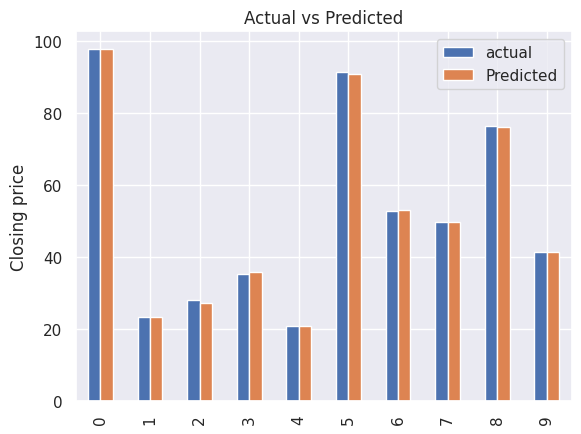

In [66]:
graph =dframe.head(10)
graph.plot(kind='bar')
plt.title('Actual vs Predicted')
plt.ylabel('Closing price')

Text(0, 0.5, 'Predicted')

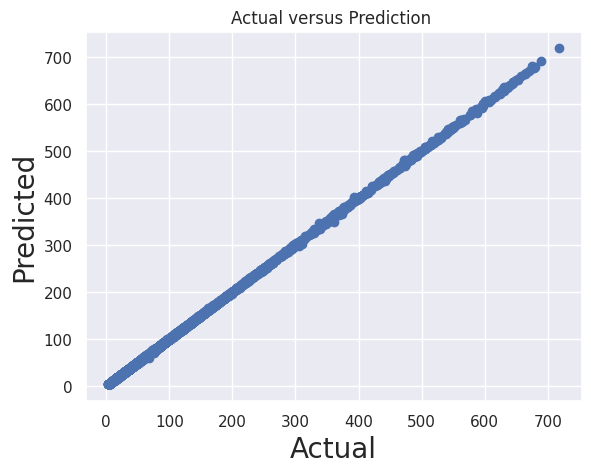

In [67]:
fig = plt.figure()
plt.scatter(y_test,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Predicted', fontsize=20)

In [68]:
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,predictions))
print('Mean squared value:',metrics.mean_squared_error(y_test,predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Abs value: 0.2243012650185559
Mean squared value: 0.2445052569169225
root mean squared error value: 0.49447472828944705
